IMPORTS + DATOS

In [217]:
from scipy import stats  
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor



In [218]:
df_lineal = pd.read_csv('Datos/Lineal/Distr.csv',index_col='indice')
df_polinomico = pd.read_csv('Datos/Polinomica/Periodica.csv',index_col='indice')
df_exp = pd.read_csv('Datos/Exp/DRIFT.csv',index_col='indice')
df_log = pd.read_csv('Datos/Log/TEND.csv',index_col='indice')
df_escal = pd.read_csv('Datos/Escalonada/ARMA.csv',index_col='indice')
df_inversa = pd.read_csv('Datos/Prop_inversa/Distr.csv',index_col='indice')

In [219]:
df_condicional =  pd.read_csv('Datos/Condicional/DRIFT-DIST-ARMA.csv',index_col='indice')
df_funcional =  pd.read_csv('Datos/Funcional/DRIFT-DIST.csv',index_col='indice')
df_interaccion =  pd.read_csv('Datos/Interaccion/PER-ARMA-TEND.csv',index_col='indice')
df_multivariante =  pd.read_csv('Datos/Multivariante/DRIFT-DIST-ARMA.csv',index_col='indice')

LINEAR REGRESSION:

In [220]:
def entrenar_linearReg(df,columns_predict):
    modelo = LinearRegression()
    l = int(df.shape[0]*0.8)
    modelo.fit(X=df[:l].drop(columns=columns_predict),y=df[columns_predict][:l])
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = modelo.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')

    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

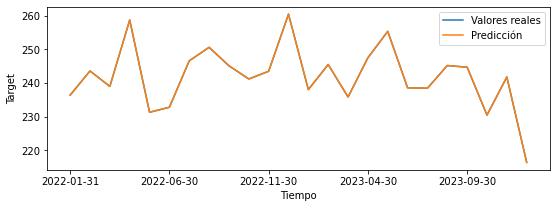

Error cuadratico medio:  2.9619097454698255e-27


In [221]:
entrenar_linearReg(df_lineal,'Target')

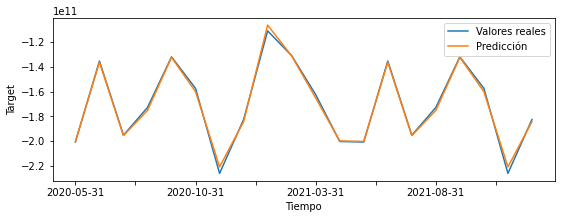

Error cuadratico medio:  5.855274699828211e+18


In [222]:
entrenar_linearReg(df_polinomico,'Target')

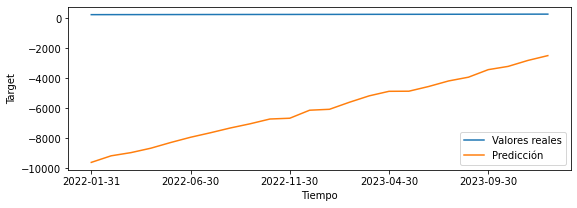

Error cuadratico medio:  44142984.52797002


In [223]:
entrenar_linearReg(df_exp,'Target')

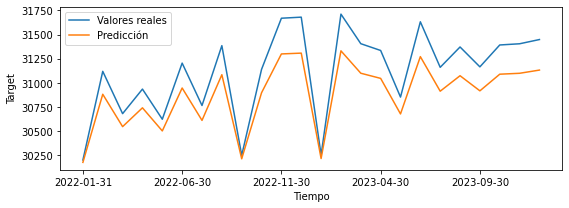

Error cuadratico medio:  67619.16156123509


In [224]:
entrenar_linearReg(df_escal,'Target')

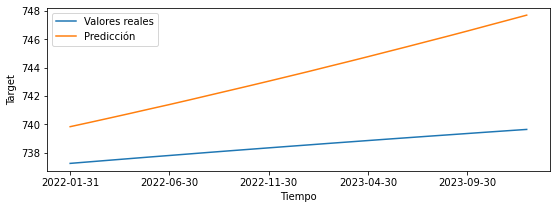

Error cuadratico medio:  29.311229957654856


In [225]:
entrenar_linearReg(df_log,'Target')

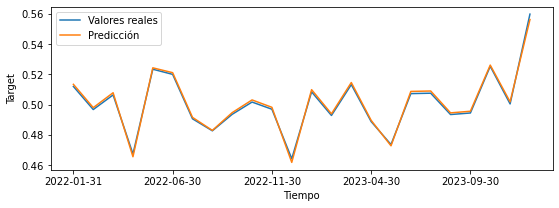

Error cuadratico medio:  2.1421825384946647e-06


In [226]:
entrenar_linearReg(df_inversa,'Target')

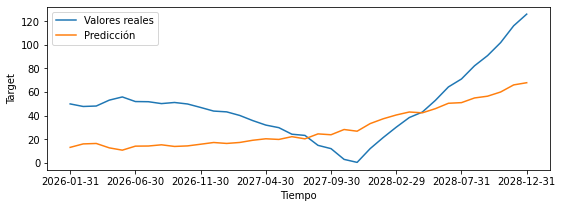

Error cuadratico medio:  832.085530996846


In [227]:
entrenar_linearReg(df_condicional,'Target')

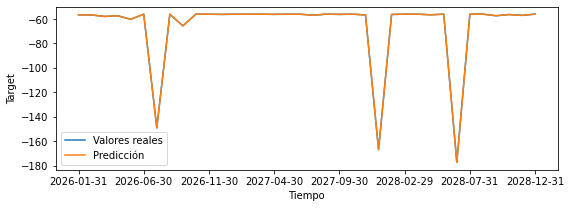

Error cuadratico medio:  6.0444275582267745e-28


In [228]:
entrenar_linearReg(df_funcional,'Target')

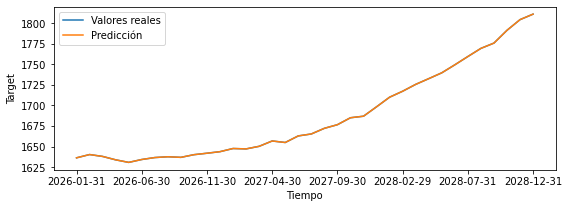

Error cuadratico medio:  2.1541161785235097e-26


In [229]:
entrenar_linearReg(df_multivariante,'Target')

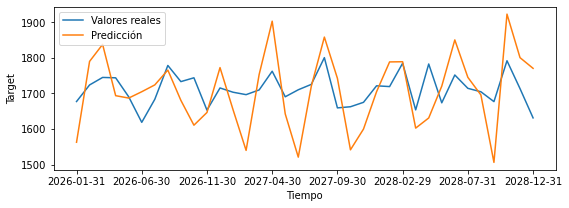

Error cuadratico medio:  8207.072799940606


In [230]:
entrenar_linearReg(df_interaccion,'Target')

ARBOLES DE DECISIÓN:

In [231]:
def entrenar_TreeReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = DecisionTreeRegressor(random_state=42)
    param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
    }  
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = DecisionTreeRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

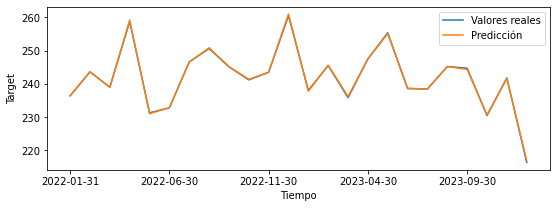

Error cuadratico medio:  0.05629793468503696


In [232]:
entrenar_TreeReg(df_lineal,'Target')

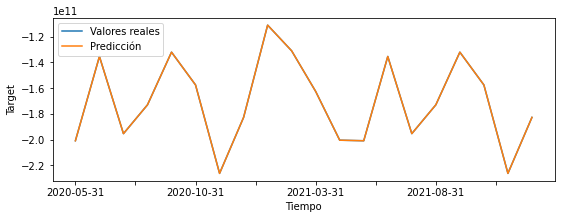

Error cuadratico medio:  1.7462298274040222e-10


In [233]:
entrenar_TreeReg(df_polinomico,'Target')

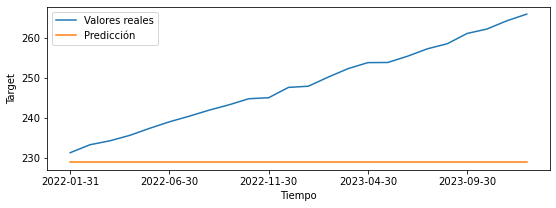

Error cuadratico medio:  476.47432142268514


In [234]:
entrenar_TreeReg(df_exp,'Target')

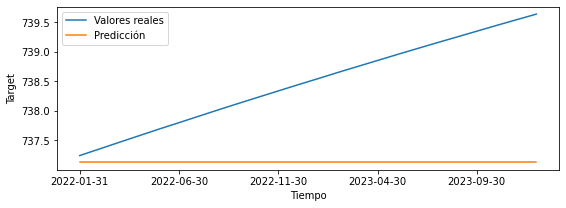

Error cuadratico medio:  2.338405409745737


In [235]:
entrenar_TreeReg(df_log,'Target')

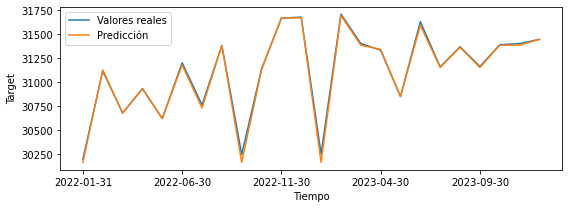

Error cuadratico medio:  821.8404643748077


In [236]:
entrenar_TreeReg(df_escal,'Target')

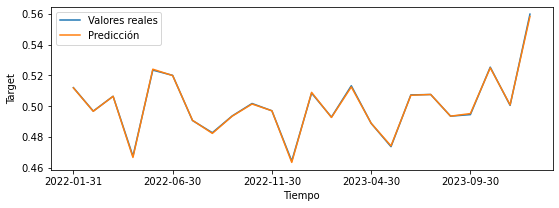

Error cuadratico medio:  2.6279375748164915e-07


In [237]:
entrenar_TreeReg(df_inversa,'Target')

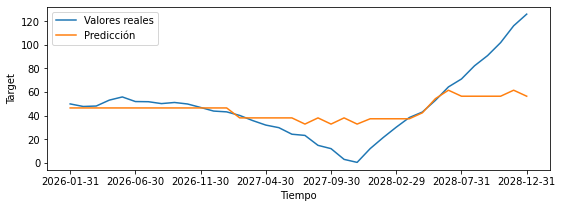

Error cuadratico medio:  469.89821070561123


In [238]:
entrenar_TreeReg(df_condicional,'Target')

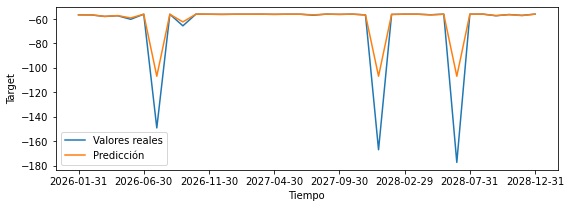

Error cuadratico medio:  288.5044066290902


In [239]:
entrenar_TreeReg(df_funcional,'Target')

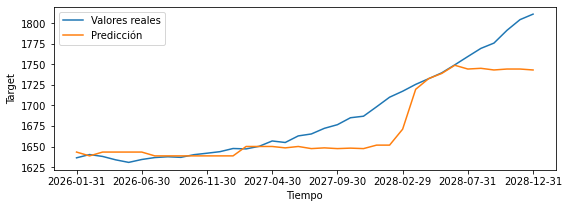

Error cuadratico medio:  707.8209192986259


In [240]:
entrenar_TreeReg(df_multivariante,'Target')

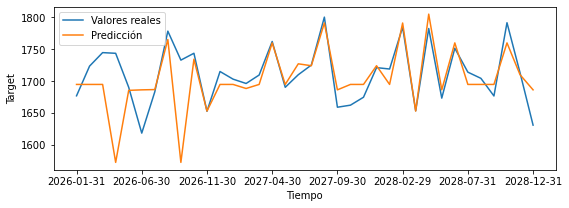

Error cuadratico medio:  2027.020655118918


In [241]:
entrenar_TreeReg(df_interaccion,'Target')

In [242]:
def entrenar_RandomForestReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = RandomForestRegressor(random_state=42)
    param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    } 
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = RandomForestRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

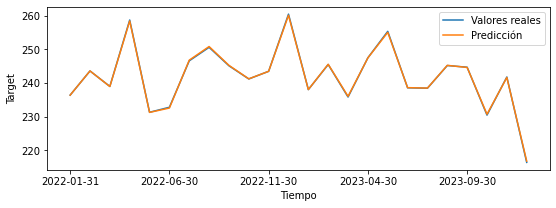

Error cuadratico medio:  0.03200112390802536


In [243]:
entrenar_RandomForestReg(df_lineal,'Target')

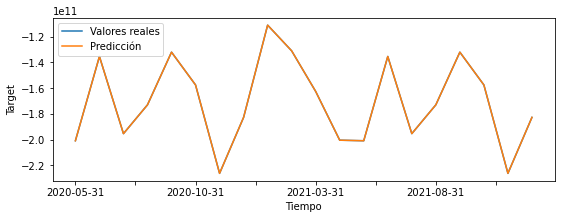

Error cuadratico medio:  353334281885382.06


In [244]:
entrenar_RandomForestReg(df_polinomico,'Target')

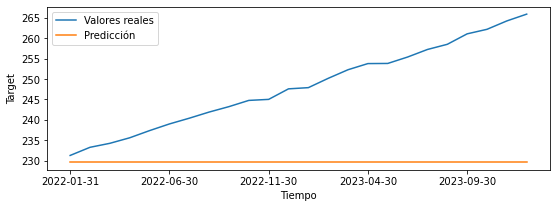

Error cuadratico medio:  449.17436051940035


In [245]:
entrenar_RandomForestReg(df_exp,'Target')

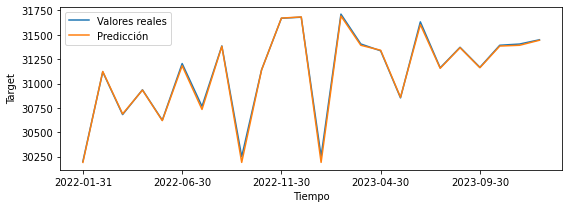

Error cuadratico medio:  441.6385948559905


In [246]:
entrenar_RandomForestReg(df_escal,'Target')

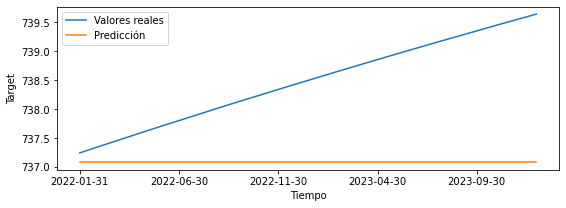

Error cuadratico medio:  2.472366467531137


In [275]:
entrenar_RandomForestReg(df_log,'Target')

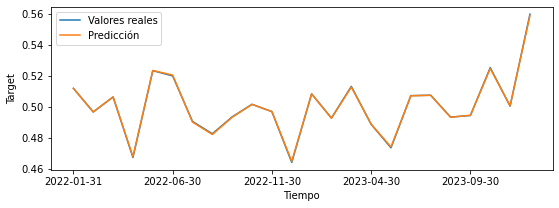

Error cuadratico medio:  1.4360703418339112e-07


In [247]:
entrenar_RandomForestReg(df_inversa,'Target')

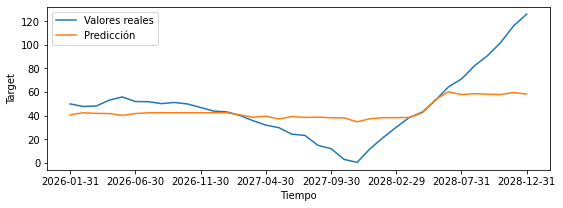

Error cuadratico medio:  494.40307182212683


In [248]:
entrenar_RandomForestReg(df_condicional,'Target')

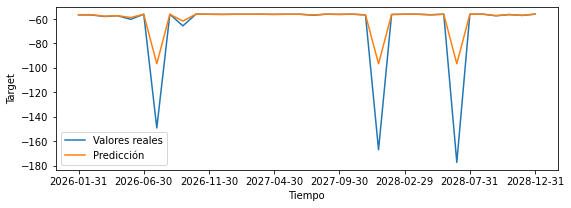

Error cuadratico medio:  395.43826714059446


In [249]:
entrenar_RandomForestReg(df_funcional,'Target')

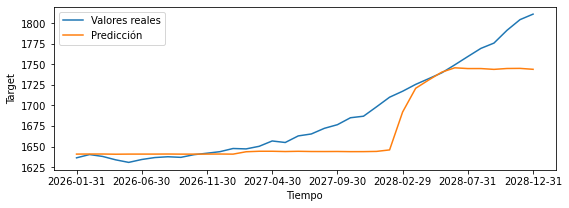

Error cuadratico medio:  738.2969087690147


In [250]:
entrenar_RandomForestReg(df_multivariante,'Target')

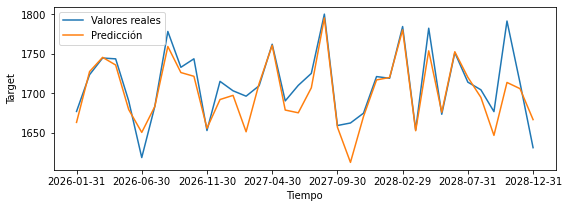

Error cuadratico medio:  511.1969502915651


In [251]:
entrenar_RandomForestReg(df_interaccion,'Target')

GRADIENT BOOSTING:

In [252]:
def entrenar_GradientBoostReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = GradientBoostingRegressor(random_state=42)
    param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
    } 
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = GradientBoostingRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

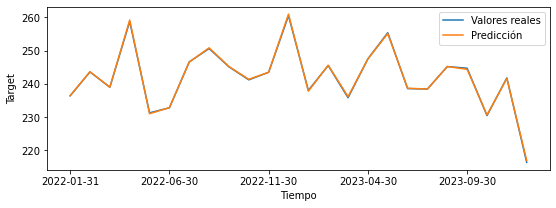

Error cuadratico medio:  0.056051667751422334


In [253]:
entrenar_GradientBoostReg(df_lineal,'Target')

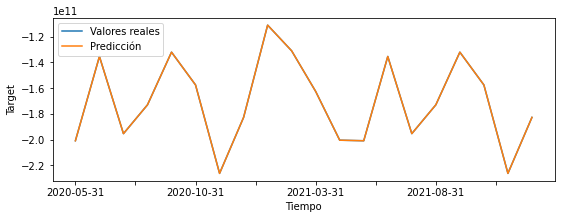

Error cuadratico medio:  0.0


In [254]:
entrenar_GradientBoostReg(df_polinomico,'Target')

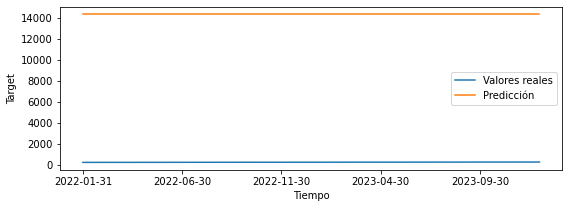

Error cuadratico medio:  199196700.09173048


In [255]:
entrenar_GradientBoostReg(df_exp,'Target')

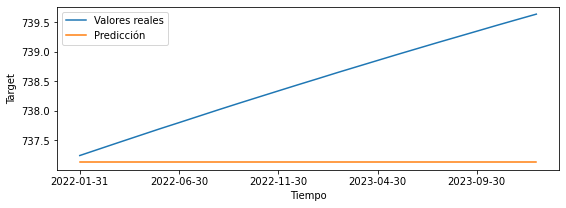

Error cuadratico medio:  2.339734690247948


In [256]:
entrenar_GradientBoostReg(df_log,'Target')

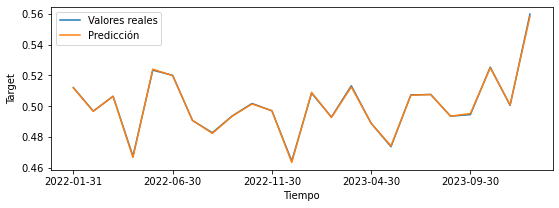

Error cuadratico medio:  2.6278710131273696e-07


In [257]:
entrenar_GradientBoostReg(df_inversa,'Target')

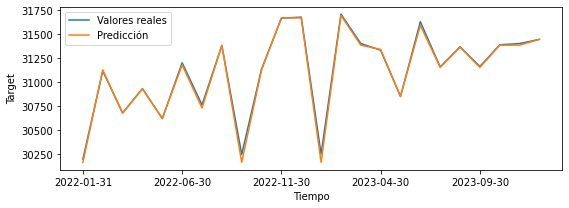

Error cuadratico medio:  821.534286346758


In [258]:
entrenar_GradientBoostReg(df_escal,'Target')

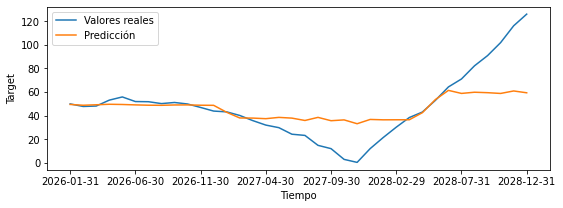

Error cuadratico medio:  439.9567802753583


In [259]:
entrenar_GradientBoostReg(df_condicional,'Target')

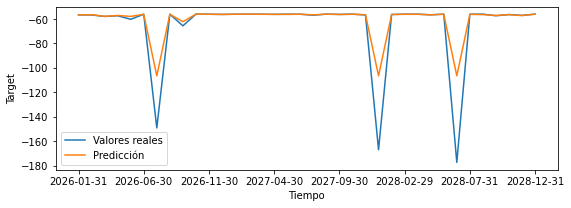

Error cuadratico medio:  291.7442343417167


In [260]:
entrenar_GradientBoostReg(df_funcional,'Target')

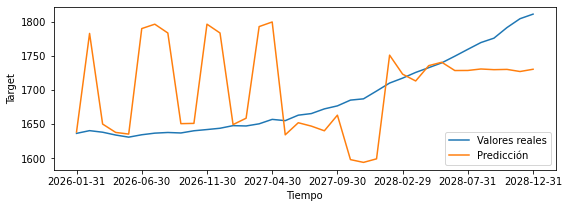

Error cuadratico medio:  6310.127383154767


In [261]:
entrenar_GradientBoostReg(df_multivariante,'Target')

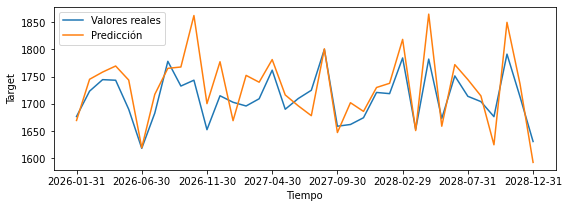

Error cuadratico medio:  1551.3738114156765


In [262]:
entrenar_GradientBoostReg(df_interaccion,'Target')

EXTRATREE REGRESSOR

In [263]:
def entrenar_ExtraTreeReg(df,columns_predict):
    
    l = int(df.shape[0]*0.8)
    X_train=df[:l].drop(columns=columns_predict)
    y_train=df[columns_predict][:l]
    
    modelo = ExtraTreesRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_depth': [ 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],
    } 
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_

    optimized_model = ExtraTreesRegressor(**best_params, random_state=42) 
    optimized_model.fit(X_train, y_train)
    
    df_pred = df[l:].copy()
    df_pred['Predicciones'] = optimized_model.predict(df[l:].drop(columns=columns_predict))
    fig, ax = plt.subplots(figsize=(9, 3))
    df_pred[columns_predict].plot(ax=ax,label='Valores reales')
    df_pred['Predicciones'].plot(ax=ax,label='Predicción')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel(columns_predict)

    plt.legend()
    plt.show()
    
    mse = mean_squared_error(df_pred['Predicciones'].values,df_pred[columns_predict].values)
    
    print("Error cuadratico medio: ", mse)

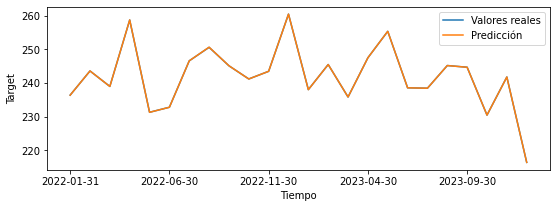

Error cuadratico medio:  0.0001723769065950688


In [264]:
entrenar_ExtraTreeReg(df_lineal,'Target')

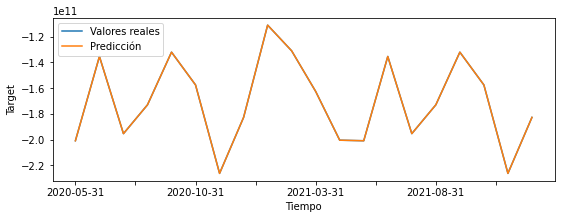

Error cuadratico medio:  6.082700565457344e-08


In [265]:
entrenar_ExtraTreeReg(df_polinomico,'Target')

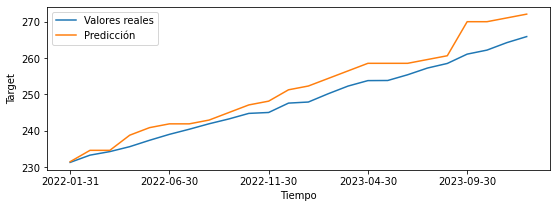

Error cuadratico medio:  17.191100653138374


In [266]:
entrenar_ExtraTreeReg(df_exp,'Target')

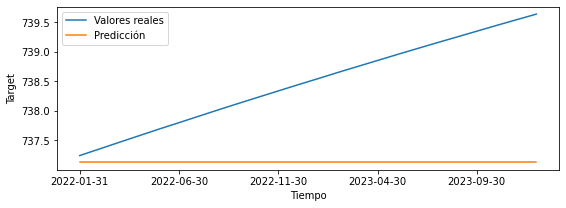

Error cuadratico medio:  2.3384054097316334


In [267]:
entrenar_ExtraTreeReg(df_log,'Target')

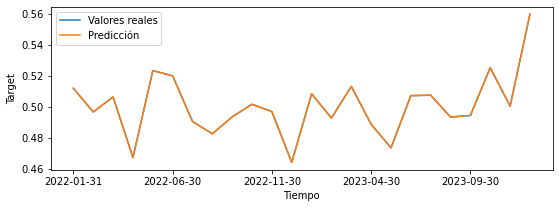

Error cuadratico medio:  6.237068859746361e-10


In [268]:
entrenar_ExtraTreeReg(df_inversa,'Target')

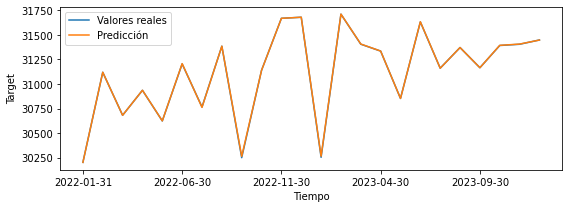

Error cuadratico medio:  14.731813976246423


In [269]:
entrenar_ExtraTreeReg(df_escal,'Target')

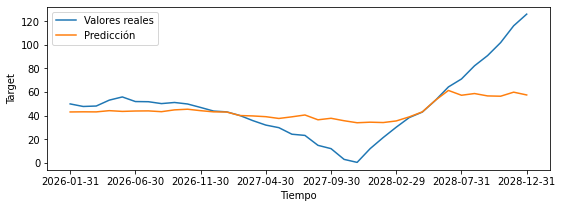

Error cuadratico medio:  476.3940720294778


In [270]:
entrenar_ExtraTreeReg(df_condicional,'Target')

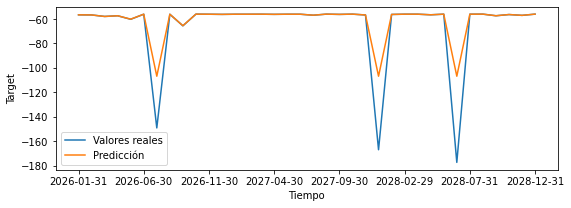

Error cuadratico medio:  288.1797507874399


In [271]:
entrenar_ExtraTreeReg(df_funcional,'Target')

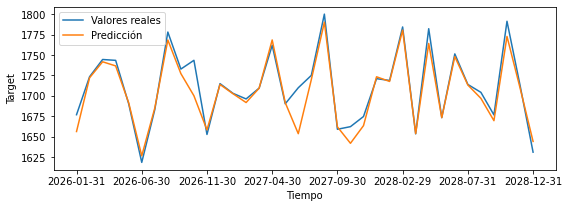

Error cuadratico medio:  208.32052319193926


In [272]:
entrenar_ExtraTreeReg(df_interaccion,'Target')

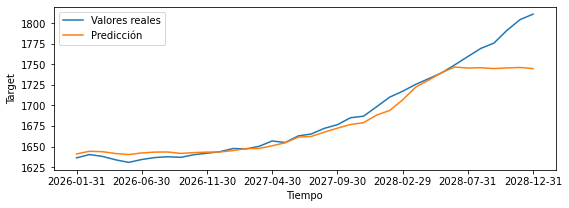

Error cuadratico medio:  352.31156100176446


In [273]:
entrenar_ExtraTreeReg(df_multivariante,'Target')